<b>US STOCK PREDICTION</b><br>
--
<b>By : Yehezk34</b><br>
We try to create a model to predict those stocks that in buy-worthy or not buy-worthy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataframe1 = pd.read_csv("2014_Financial_Data.csv")
dataframe2 = pd.read_csv("2015_Financial_Data.csv")
dataframe3 = pd.read_csv("2016_Financial_Data.csv")
dataframe4 = pd.read_csv("2017_Financial_Data.csv")
dataframe5 = pd.read_csv("2018_Financial_Data.csv")

In [5]:
# Concat all dataset!
dataFrame = pd.concat([dataframe1,dataframe2,dataframe3,dataframe4,dataframe5], axis=0)
dataFrame.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
count,2.090600e+04,19989.000000,2.030600e+04,2.087000e+04,1.993900e+04,2.040800e+04,2.037500e+04,2.097600e+04,2.035800e+04,2.071300e+04,...,19213.000000,19462.000000,19598.000000,19655.000000,3.808000e+03,22077.000000,4120.000000,4.797000e+03,4960.000000,4392.000000
mean,5.161619e+09,3.622214,3.258565e+09,1.970452e+09,1.033333e+08,8.699279e+08,1.368670e+09,5.896979e+08,9.778939e+07,4.925003e+08,...,0.783208,3.733922,0.295610,0.365149,9.751560e+02,0.550754,103.077642,3.650260e+02,-4.461547,20.803948
std,3.197314e+10,312.648170,2.583093e+10,8.735750e+09,7.676062e+08,3.804283e+09,5.662984e+09,2.976454e+09,4.996543e+08,2.484345e+09,...,66.524006,174.864701,12.974127,15.030054,4.098461e+04,0.497429,3756.530835,1.940149e+04,561.802215,82.622147
min,-6.276160e+08,-12.769300,-2.986888e+09,-1.280800e+10,-1.098000e+08,-1.401594e+08,-5.495512e+09,-1.933900e+10,-1.710954e+09,-2.177200e+10,...,-3963.131200,-1.051000,-2.662200,-2.369900,-1.003972e+02,0.000000,-99.947830,-9.999941e+01,-99.999115,-99.864779
25%,5.880737e+07,-0.014700,3.211750e+06,3.035575e+07,0.000000e+00,1.768550e+07,3.564150e+07,-4.433750e+06,0.000000e+00,-8.745000e+06,...,-0.103800,-0.067475,0.000000,-0.013700,-2.857143e+01,0.000000,-5.172844,-6.730768e+00,-33.388915,-7.477173
50%,4.352510e+08,0.057600,1.530115e+08,1.943525e+08,0.000000e+00,8.062450e+07,1.564000e+08,3.585350e+07,3.697000e+06,2.380000e+07,...,0.032400,0.000000,0.000000,0.061000,-5.281842e+00,1.000000,17.278935,1.090686e+01,-13.336397,17.639393
75%,2.287259e+09,0.182400,1.180224e+09,8.806035e+08,1.220150e+07,3.699722e+08,6.210870e+08,2.554363e+08,4.969325e+07,1.964680e+08,...,0.142100,0.150075,0.000000,0.185350,1.331484e+01,1.000000,40.567983,3.155634e+01,2.124593,39.625879
max,1.886890e+12,42138.663900,1.581530e+12,4.621600e+11,2.883700e+10,1.856830e+11,3.056050e+11,1.565540e+11,3.152300e+10,8.720500e+10,...,7039.325900,17646.823500,1542.611000,2042.000000,2.418601e+06,1.000000,212700.011600,1.321281e+06,39219.999110,3756.716345


In [7]:
dataFrame.head()

,Corporation,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class,2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%]
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0,NaN,NaN,NaN,NaN
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,108330319.7,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0,NaN,NaN,NaN,NaN
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.0,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1,NaN,NaN,NaN,NaN
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.0,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1,NaN,NaN,NaN,NaN
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.0,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1,NaN,NaN,NaN,NaN


In [8]:
cols = list(dataFrame)
new_columns = (dataFrame.columns.drop("Class").tolist()) + ["Class"]
dataFrame = dataFrame[new_columns]

dataFrame.corr()["Class"].sort_values()

Dividend payments                     -0.045276
Issuance (buybacks) of shares         -0.032965
Net Current Asset Value               -0.030292
Investing Cash flow                   -0.025029
Stock-based compensation to Revenue   -0.023396
                                         ...   
cashConversionCycle                    0.101949
operatingCycle                         0.288801
2019 PRICE VAR [%]                     0.423306
Class                                  1.000000
operatingProfitMargin                       NaN
Name: Class, Length: 227, dtype: float64

In [9]:
dataFrame.isnull().sum()

Corporation               0
Revenue                1171
Revenue Growth         2088
Cost of Revenue        1771
Gross Profit           1207
                      ...  
2016 PRICE VAR [%]    17957
2017 PRICE VAR [%]    17280
2018 PRICE VAR [%]    17117
2019 PRICE VAR [%]    17685
Class                     0
Length: 229, dtype: int64

In [16]:
dataFrame = dataFrame.fillna(dataFrame.mean())
dataFrame.isnull().sum()

Corporation           0
Revenue               0
Revenue Growth        0
Cost of Revenue       0
Gross Profit          0
                     ..
2016 PRICE VAR [%]    0
2017 PRICE VAR [%]    0
2018 PRICE VAR [%]    0
2019 PRICE VAR [%]    0
Class                 0
Length: 229, dtype: int64

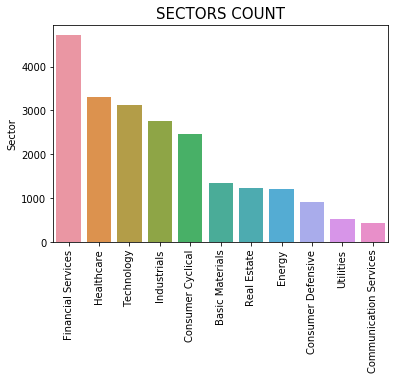

In [17]:
# Count the Sector!
sector = dataFrame['Sector'].value_counts()
sbn.barplot(np.arange(len(sector)), sector)
plt.xticks(np.arange(len(sector)), sector.index.values.tolist(), rotation=90)
plt.title('SECTORS COUNT', fontsize=15)
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["Corporation","Sector"] 
le = LabelEncoder()
dataFrame[categorical_cols] = dataFrame[categorical_cols].apply(lambda col: le.fit_transform(col))

In [23]:
dataFrame.head()

,Corporation,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%],Class
0,3550,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,0.122800,0.0000,-0.1746,3,-9.323276,103.077642,365.025973,-4.461547,20.803948,0
1,4695,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,108330319.7,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,3.733922,1.6484,1.7313,3,-25.512193,103.077642,365.025973,-4.461547,20.803948,0
2,2570,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.0,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.273800,0.0000,0.0234,3,33.118297,103.077642,365.025973,-4.461547,20.803948,1
3,3757,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.0,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,-0.045800,0.0000,-0.0060,3,2.752291,103.077642,365.025973,-4.461547,20.803948,1
4,1916,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.0,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.102500,0.0000,-0.0220,3,12.897715,103.077642,365.025973,-4.461547,20.803948,1


In [26]:
# Now split them!
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # For feature scaling!

X = dataFrame.iloc[:, :-1].values
y = dataFrame.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
X_train

array([[-3.19601249e-01, -1.15401368e-01, -1.21914360e-02, ...,
         1.56688856e-01, -2.87705405e-04, -1.51496756e-03],
       [-4.79484578e-01, -1.61713366e-01, -1.09292652e-02, ...,
         1.56688856e-01, -5.94923693e-02, -1.51496756e-03],
       [-9.90725181e-02,  1.26273147e-01, -1.17557368e-02, ...,
        -6.92605364e-01, -2.87705405e-04, -1.51496756e-03],
       ...,
       [ 9.59465388e-01,  1.28189030e-01, -1.22200805e-02, ...,
         1.56688856e-01, -2.87705405e-04, -1.51496756e-03],
       [-1.29395219e-01, -1.63429319e-01, -1.23268193e-02, ...,
         1.56688856e-01, -2.87705405e-04, -1.51496756e-03],
       [-2.89967700e-01,  4.40345103e-02, -1.17910149e-02, ...,
         1.56688856e-01,  2.08003370e-02, -1.51496756e-03]])

In [28]:
X_test

array([[ 5.37015039e-01, -1.67882404e-01, -1.22604845e-02, ...,
         1.56688856e-01,  2.81989121e-02, -1.51496756e-03],
       [ 1.02286740e+00, -5.34540406e-02, -1.20255989e-02, ...,
        -6.93309379e-01, -2.87705405e-04, -1.51496756e-03],
       [ 1.13244261e+00,  4.32905597e-01, -1.20831896e-02, ...,
         1.56688856e-01, -2.87705405e-04, -1.51496756e-03],
       ...,
       [ 2.95811740e-01, -1.41714777e-01, -1.19173525e-02, ...,
         1.56688856e-01, -2.87705405e-04, -1.51496756e-03],
       [ 1.68789935e+00, -1.68452385e-01, -1.20856018e-02, ...,
         1.56688856e-01, -2.87705405e-04, -1.68497345e+00],
       [ 8.18878322e-01, -9.20174340e-02, -7.58327660e-03, ...,
         1.56688856e-01, -1.70520733e-01, -1.51496756e-03]])

In [29]:
y_train

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [30]:
y_test

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [33]:
# Now create the model!
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(units=70,activation = "relu"))
model.add(Dropout(0.6))
model.add(Dense(units=60,activation = "relu"))
model.add(Dropout(0.6))
model.add(Dense(units=50,activation = "relu"))
model.add(Dropout(0.6))
model.add(Dense(units=1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")

In [38]:
earlyStopping = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)
model.fit(x=X_train, y=y_train, epochs = 170, validation_data = (X_test,y_test), verbose = 1, callbacks=[earlyStopping])

Epoch 1/170
552/552 [==============================] - 1s 1ms/step - loss: 0.2351 - val_loss: 0.6624
Epoch 2/170
552/552 [==============================] - 1s 1ms/step - loss: 0.2498 - val_loss: 0.5219
Epoch 3/170
552/552 [==============================] - 1s 1ms/step - loss: 0.2429 - val_loss: 0.5298
Epoch 4/170
552/552 [==============================] - 1s 1ms/step - loss: 0.2482 - val_loss: 0.4882
Epoch 5/170
552/552 [==============================] - 1s 1ms/step - loss: 0.2434 - val_loss: 0.5003
Epoch 6/170
552/552 [==============================] - 1s 1ms/step - loss: 0.2372 - val_loss: 0.5195
Epoch 7/170
552/552 [==============================] - 1s 1ms/step - loss: 0.2360 - val_loss: 0.5572
Epoch 8/170
552/552 [==============================] - 1s 1ms/step - loss: 0.2494 - val_loss: 0.5392
Epoch 9/170
552/552 [==============================] - 1s 1ms/step - loss: 0.2300 - val_loss: 0.5370
Epoch 10/170
552/552 [==============================] - 1s 1ms/step - loss: 0.2423 - val_lo

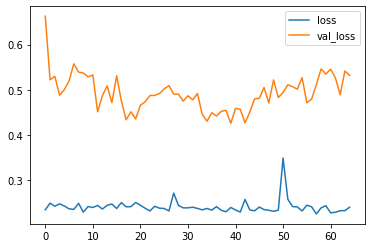

In [39]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [41]:
# Predict your model!
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
y_pred = model.predict_classes(X_test)
y_pred = y_pred.reshape(len(y_test),)
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1969
           1       0.89      0.89      0.89      2447

    accuracy                           0.87      4416
   macro avg       0.87      0.87      0.87      4416
weighted avg       0.87      0.87      0.87      4416

[[1691  278]
 [ 275 2172]]


In [42]:
print("Test accuracy :",accuracy_score(y_test, y_pred))

Test accuracy : 0.8747735507246377


In [ ]:
# Done